In [1]:
from transformers import DPRContextEncoder, DPRContextEncoderTokenizer
from transformers import DPRQuestionEncoder, DPRQuestionEncoderTokenizer

In [3]:
ctx_model = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

question_model = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokeniz

In [5]:
questions = [
    "what is the capital city of australia?",
    "what is the best selling sci-fi book?",
    "how many searches are performed on Google?"
]

contexts = [
    "canberra is the capital city of australia",
    "what is the capital city of australia?",
    "the capital city of france is paris",
    "what is the best selling sci-fi book?",
    "sc-fi is a popular book genre read by millions",
    "the best-selling sci-fi book is dune",
    "how many searches are performed on Google?",
    "Google serves more than 2 trillion queries annually",
    "Google is a popular search engine"
]

In [8]:
xb_tokens = ctx_tokenizer(contexts, max_length=256, padding='max_length', truncation=True, return_tensors='pt') 
xb = ctx_model(**xb_tokens)

xq_tokens = question_tokenizer(questions, max_length=256, padding='max_length', truncation=True, return_tensors='pt') 
xq = question_model(**xq_tokens)

In [9]:
xb.pooler_output.shape, xq.pooler_output.shape

(torch.Size([9, 768]), torch.Size([3, 768]))

In [10]:
import torch
import torch.nn.functional as F

In [16]:
for i, qv in enumerate(xq.pooler_output):
    score = F.cosine_similarity(qv, xb.pooler_output)
    argmax = torch.argmax(score)
    print(questions[i])
    print(contexts[argmax])
    print('------')

what is the capital city of australia?
canberra is the capital city of australia
------
what is the best selling sci-fi book?
the best-selling sci-fi book is dune
------
how many searches are performed on Google?
how many searches are performed on Google?
------


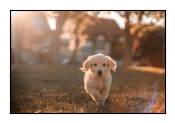

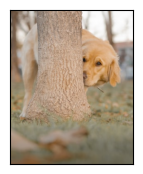

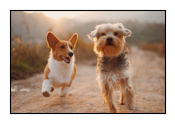

In [28]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

urls = [
    "https://images.unsplash.com/photo-1576201836106-db1758fd1c97?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80",
    "https://images.unsplash.com/photo-1591294100785-81d39c061468?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=300&q=80",
    "https://images.unsplash.com/photo-1548199973-03cce0bbc87b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80"
]

images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls
] 

for img in images: 
    plt.figure(figsize=(2, 2))
    plt.xticks([])
    plt.yticks([])
    plt.show(plt.imshow(img))


In [29]:
from transformers import CLIPModel, CLIPProcessor

In [31]:
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

In [33]:
captions = ["a dog hiding behind a tree",
            "two dogs running",
            "a dog running",
            "a cucumber on a tree",
            "trees in the park",
            "a cucumber dog"]

In [40]:
inputs = processor(text=captions, images=images, padding=True, return_tensors='pt')  
outputs = model(**inputs)
probs = outputs.logits_per_image.argmax(dim=1)
probs.shape

torch.Size([3])

a dog running


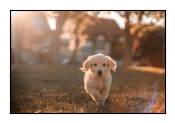

-----
a dog hiding behind a tree


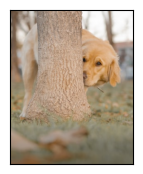

-----
two dogs running


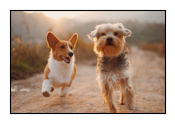

-----


In [44]:
for i, p in  enumerate(probs):
    print(captions[p])
    img = images[i]
    plt.figure(figsize=(2, 2))
    plt.xticks([])
    plt.yticks([])
    plt.show(plt.imshow(img))
    print('-----')
